# Original (fake machine)

### Build Quantum Circuit

In [1]:
from qiskit import QuantumCircuit
from numpy import pi

In [2]:
def make_circuit(num):

    circuit = QuantumCircuit(6, 6)
    
    for i in range (3):
        circuit.rx(-pi/2, i)
    for i in range (3, 6):
        circuit.rx(pi/2, i)

    circuit.barrier()

    for i in range(num):
        circuit.cx(1, 2)
        circuit.cx(3, 4)

        circuit.rx(-0.2, 1)
        circuit.rz(-0.2, 2)
        circuit.rx(-0.2, 3)
        circuit.rz(-0.2, 4)

        circuit.cx(1, 2)
        circuit.cx(3, 4)

        circuit.cx(0, 1)
        circuit.cx(2, 3)
        circuit.cx(4, 5)

        circuit.rx(-0.4, 0)
        circuit.rz(-0.4, 1)
        circuit.rx(-0.4, 2)
        circuit.rz(-0.4, 3)
        circuit.rx(-0.4, 4)
        circuit.rz(-0.4, 5)

        circuit.cx(0, 1)
        circuit.cx(2, 3)
        circuit.cx(4, 5)

        circuit.cx(1, 2)
        circuit.cx(3, 4)

        circuit.rx(-0.2, 1)
        circuit.rz(-0.2, 2)
        circuit.rx(-0.2, 3)
        circuit.rz(-0.2, 4)

        circuit.cx(1, 2)
        circuit.cx(3, 4)

        circuit.barrier()

    for i in range(6):
        circuit.rx(-pi/2, i)


    circuit.measure(5, 5)

    
    return circuit

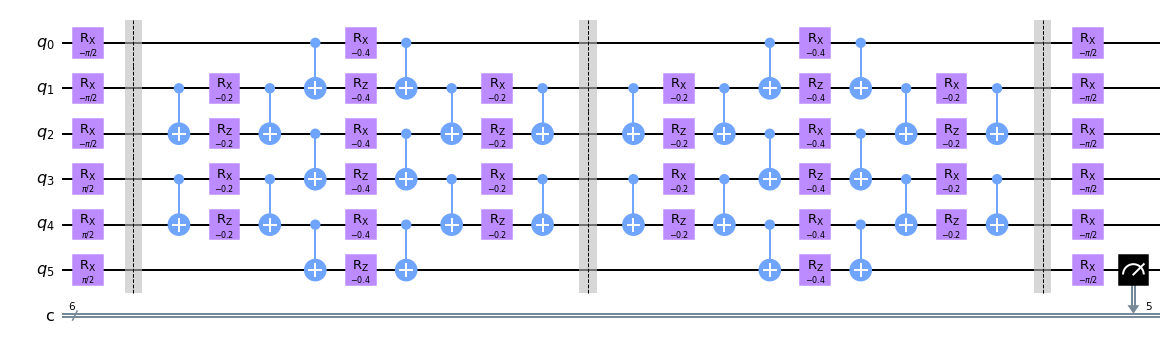

In [3]:
# check circuit
circ = make_circuit(2)
circ.draw('mpl')

### Execute Quantum Circuit

In [4]:
from qiskit.test.mock import FakeMontreal
from qiskit.providers.aer import AerSimulator
from qiskit import transpile
from tqdm import notebook

device_backend = FakeMontreal()
sim_mont = AerSimulator.from_backend(device_backend)

In [5]:
x_list = []
y_list = []

for num in notebook.tqdm(range(448)):
    x = []
    y = []
    for i in range(16):
        circuit = make_circuit(i)
        tcirc = transpile(circuit, sim_mont)

        result_noise = sim_mont.run(tcirc).result()
        counts_noise = result_noise.get_counts()

        prob_000000 = counts_noise['000000']/1024
        try:
            prob_100000 = counts_noise['100000']/1024
        except:
            prob_100000 = 0

        prob_tot = prob_000000 - prob_100000
        x.append(i*0.2)    
        y.append(prob_tot)
    x_list.append(x)
    y_list.append(y)

  0%|          | 0/448 [00:00<?, ?it/s]

### Result

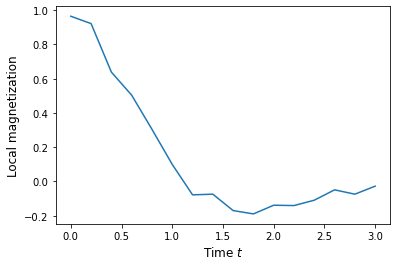

In [6]:
# once
from matplotlib import pyplot as plt
import random

x = x_list[0]
yc = random.choice(y_list)
plt.plot(x, yc)
plt.xlabel(r'Time $t$', fontsize="12")
plt.ylabel(r'Local magnetization', fontsize="12")

plt.show()

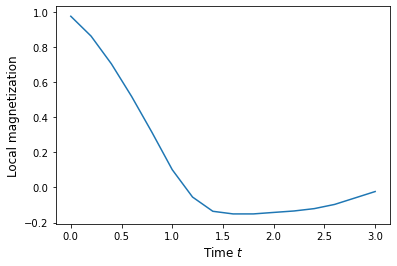

In [7]:
# mean
from matplotlib import pyplot as plt
import numpy as np
import random

x = x_list[0]
s = np.mean(y_list, axis=0)
plt.plot(x, s)
plt.xlabel(r'Time $t$', fontsize="12")
plt.ylabel(r'Local magnetization', fontsize="12")

plt.show()

In [8]:
# save
import numpy as np

np.save('./ori_all', y_list)
np.save('./ori_once', yc)
np.save('./ori_mean', s)